In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import custom_library as cl
import seaborn as sn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [2]:
# Import data and view first 5 rows
data_train = '/home/spid3r404/Documents/data_science/projects/titanic/train.csv'
data_test = '/home/spid3r404/Documents/data_science/projects/titanic/test.csv'
df_train = pd.read_csv(data_train)
df_test = pd.read_csv(data_test)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# View first 5 rows
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# View df information
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


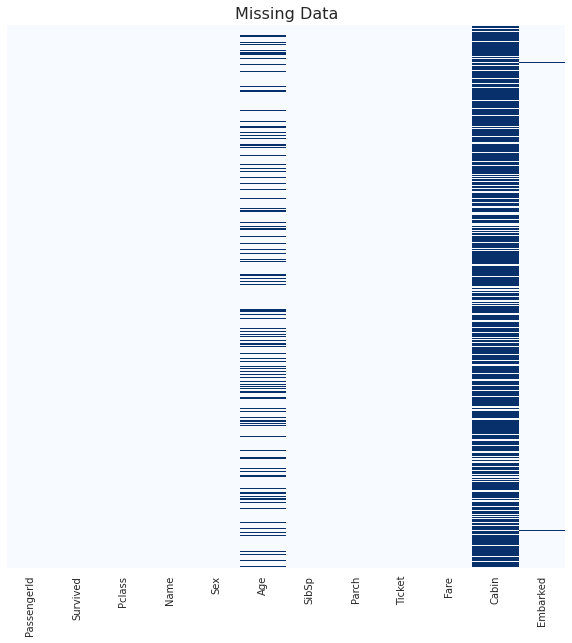

In [5]:
# Visual inspection of null values
plt.figure(figsize = (10,10))
sn.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.title("Missing Data", fontsize=16)
plt.show()
plt.close()

In [6]:
# using custom library to display only columns with null values
null_values = cl.null_only(df_train)
print(null_values)

Age 177
Cabin 687
Embarked 2
None


In [7]:
# printing the percentage of null values in each column
print(cl.percent_null(df_train, 'Age'))
print(cl.percent_null(df_train, 'Cabin'))
print(cl.percent_null(df_train, 'Embarked'))

0.2
0.77
0.0


In [8]:
# Using interpolate to fill null values in age column
df_train['Age'] = df_train['Age'].interpolate()
df_test['Age'] = df_test['Age'].interpolate()

In [9]:
# analyzing the number of labels of each column
cl.number_of_labels(df_train)

PassengerId :  891 labels
Survived :  2 labels
Pclass :  3 labels
Name :  891 labels
Sex :  2 labels
Age :  155 labels
SibSp :  7 labels
Parch :  7 labels
Ticket :  681 labels
Fare :  248 labels
Cabin :  148 labels
Embarked :  4 labels


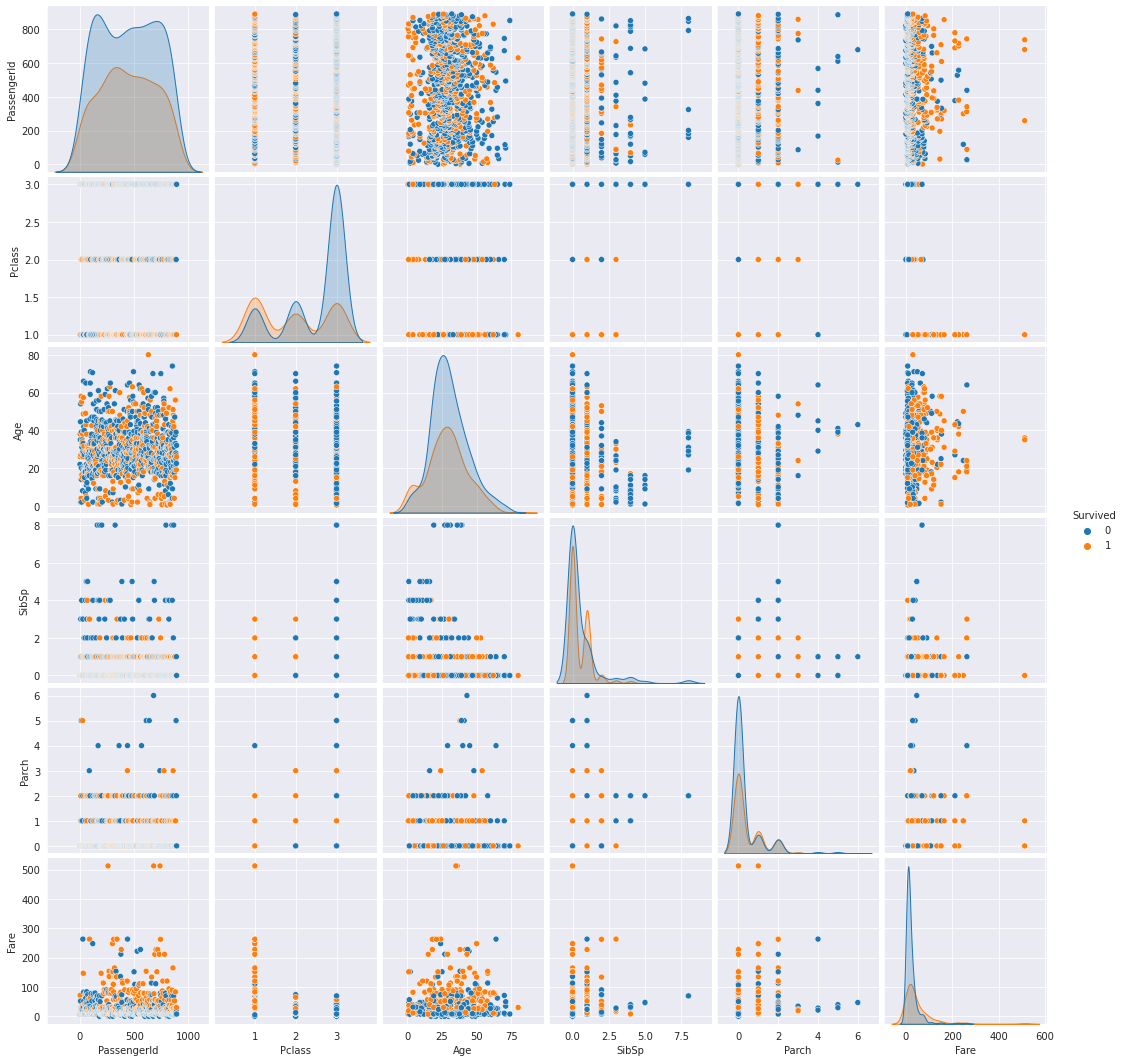

In [10]:
sn.pairplot(df_train, hue='Survived')
plt.show()
plt.close()

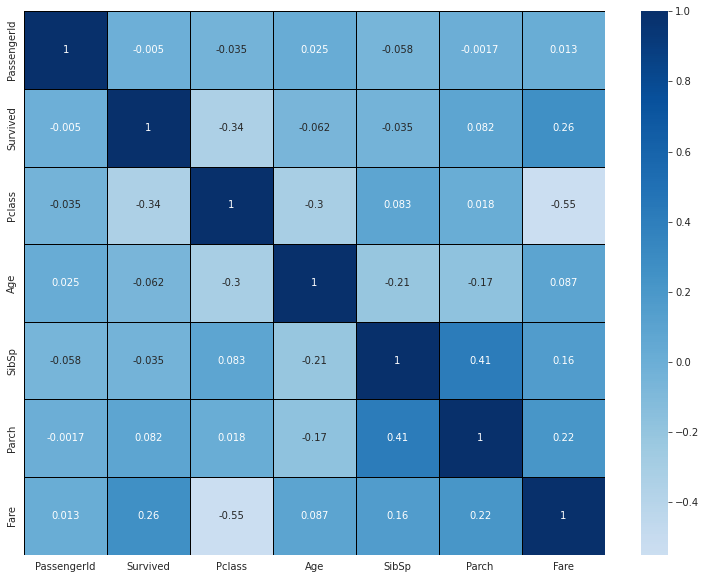

In [11]:
# Heat map to show correlation
plt.figure(figsize=(13,10))
sn.heatmap(df_train.corr(), cmap='Blues', annot=True, linewidths=.5, linecolor='black', center=0)
plt.show()
plt.close()

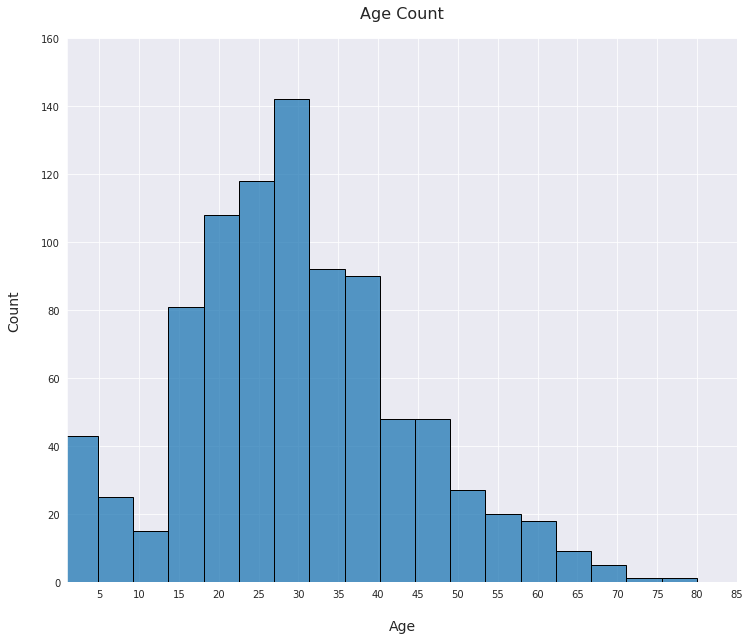

In [12]:
plt.figure(figsize=(12,10))
sn.histplot(data=df_train['Age'], bins=18, edgecolor='black')
plt.xticks(np.arange(0,90,step=5))
plt.title("Age Count", fontsize=16, pad=20)
plt.xlabel('Age', fontsize=14, labelpad=20)
plt.ylabel('Count', fontsize=14, labelpad=20)
plt.ylim(0,160)
plt.xlim(1,85)
plt.show()
plt.close()

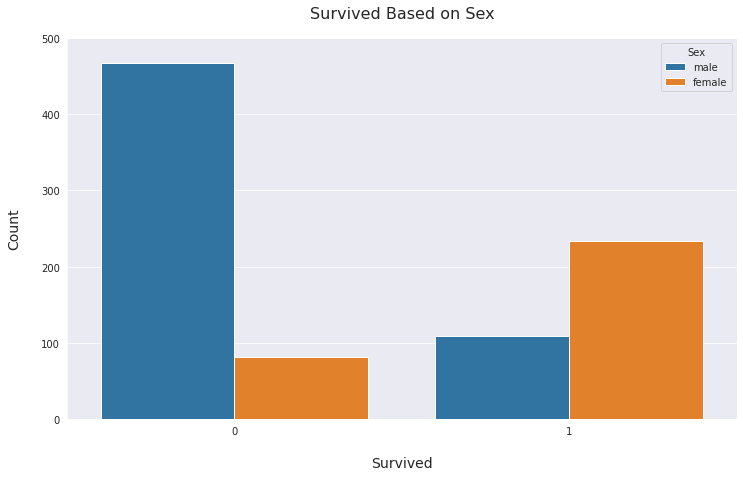

In [13]:
# Survived based on gender
plt.figure(figsize=(12,7))
sn.countplot(x='Survived', hue='Sex', data=df_train)
plt.title("Survived Based on Sex", pad=20, fontsize=16)
plt.xlabel("Survived", labelpad=20, fontsize=14)
plt.ylabel("Count", labelpad=20, fontsize=14)
plt.ylim(0,500)
plt.show()
plt.close()

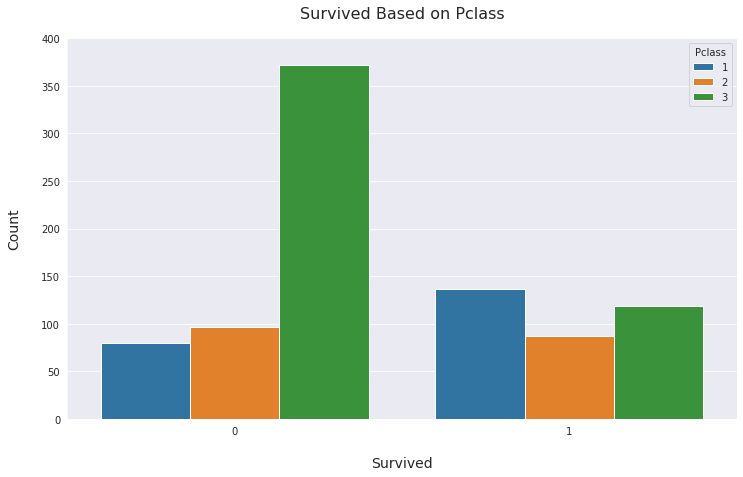

In [14]:
# Survived based on class
plt.figure(figsize=(12,7))
sn.countplot(x='Survived', hue='Pclass', data=df_train)
plt.title("Survived Based on Pclass", pad=20, fontsize=16)
plt.xlabel("Survived", labelpad=20, fontsize=14)
plt.ylabel("Count", labelpad=20, fontsize=14)
plt.ylim(0,400)
plt.show()
plt.close()

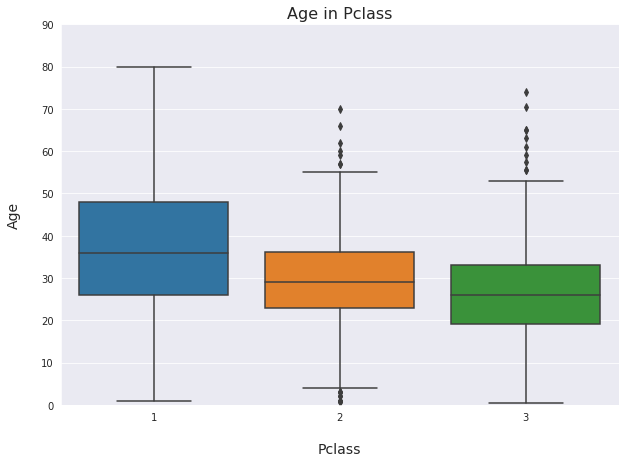

In [15]:
# Evaluating age and Pclass
plt.figure(figsize=(10,7))
sn.boxplot(x='Pclass', y='Age', data=df_train)
plt.title("Age in Pclass", fontsize=16)
plt.ylabel("Age", fontsize=14, labelpad=20)
plt.xlabel("Pclass", fontsize=14, labelpad=20)
plt.ylim(0,90)
plt.ylabel("Age")
plt.show()
plt.close()

In [16]:
# Creating new df for desired columns eliminating any null values in Embarked
new_df_train = df_train.loc[df_train['Embarked'].notnull(), ['Survived', 'Pclass', 'Sex', 'Embarked', 'Parch', 'Age', 'SibSp']]

In [17]:
# Displaying shape of new df
new_df_train.shape

(889, 7)

In [18]:
# Checking new df to see if any null values are left
print(new_df_train.isnull().sum())

Survived    0
Pclass      0
Sex         0
Embarked    0
Parch       0
Age         0
SibSp       0
dtype: int64


In [19]:
# Viewing df top 5
new_df_train.head()

,Survived,Pclass,Sex,Embarked,Parch,Age,SibSp
0,0,3,male,S,0,22.0,1
1,1,1,female,C,0,38.0,1
2,1,3,female,S,0,26.0,0
3,1,1,female,S,0,35.0,1
4,0,3,male,S,0,35.0,0


In [20]:
# Creating train and test values X and y for training and testing
X = new_df_train.drop(columns='Survived')
y = new_df_train['Survived']

In [21]:
print(X.head())

   Pclass     Sex Embarked  Parch   Age  SibSp
0       3    male        S      0  22.0      1
1       1  female        C      0  38.0      1
2       3  female        S      0  26.0      0
3       1  female        S      0  35.0      1
4       3    male        S      0  35.0      0


In [22]:
# Checking shape
print(X.shape)
print(y.shape)

(889, 6)
(889,)


In [23]:
# Creating logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=500, n_jobs=6)

In [24]:
rf = RandomForestRegressor(max_depth=150, max_leaf_nodes=500, n_jobs=6, n_estimators=100)

In [25]:
y.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [26]:
ohe = OneHotEncoder(sparse=False)

In [27]:
# Example code for ohe
ohe.fit_transform(new_df_train[['Embarked']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [28]:
# Example code continued
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [29]:
X = new_df_train.drop('Survived', axis='columns')

In [30]:
print(X.shape)
X.head()

(889, 6)


,Pclass,Sex,Embarked,Parch,Age,SibSp
0,3,male,S,0,22.0,1
1,1,female,C,0,38.0,1
2,3,female,S,0,26.0,0
3,1,female,S,0,35.0,1
4,3,male,S,0,35.0,0


In [31]:
column_trans = make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked']), remainder='passthrough')

In [32]:
column_trans.fit_transform(X)

array([[ 0. ,  1. ,  0. , ...,  0. , 22. ,  1. ],
       [ 1. ,  0. ,  1. , ...,  0. , 38. ,  1. ],
       [ 1. ,  0. ,  0. , ...,  0. , 26. ,  0. ],
       ...,
       [ 1. ,  0. ,  0. , ...,  2. , 22.5,  1. ],
       [ 0. ,  1. ,  1. , ...,  0. , 26. ,  0. ],
       [ 0. ,  1. ,  0. , ...,  0. , 32. ,  0. ]])

In [33]:
pipe = make_pipeline(column_trans, lr)

In [34]:
pipe_rf = make_pipeline(column_trans, rf)

In [35]:
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7851837745191392

In [36]:
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=500, n_jobs=6))])

In [37]:
pipe_rf.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=150, max_leaf_nodes=500,
                                       n_jobs=6))])

In [38]:
preds = pipe.predict(X)
preds_rf = pipe_rf.predict(X)

In [39]:
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.70      0.73       340

    accuracy                           0.80       889
   macro avg       0.79      0.78      0.78       889
weighted avg       0.79      0.80      0.80       889



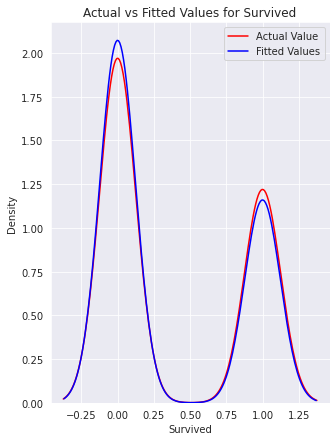

In [40]:
plt.figure(figsize=(5, 7))
ax = sn.kdeplot(y, color="r", label="Actual Value")
sn.kdeplot(preds, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Survived')
plt.legend()
plt.show()
plt.close()

In [41]:
pipe_rf.score(X, y)

0.8120610516841091

In [42]:
# Evaluating root mean squared error to determine how close the lr model is to the best fit line regarding the distance of predicted
# values and actual values (standard deviation)
np.sqrt(mean_squared_error(y, preds))

0.4512200683217037

In [43]:
# Evaluating mean squared error to determine how close the lr model is to the best fit line
mean_squared_error(y, preds)

0.20359955005624297

In [44]:
# Similar to previous metrics but using an average for weighted purposes
mean_absolute_error(y, preds)

0.20359955005624297

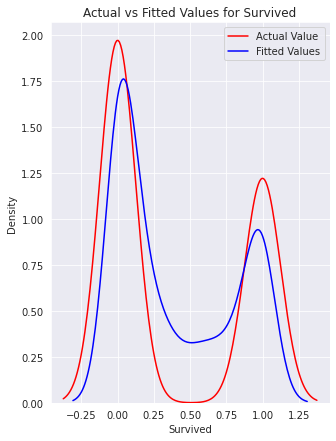

In [45]:
plt.figure(figsize=(5, 7))
ax = sn.kdeplot(y, color="r", label="Actual Value")
sn.kdeplot(preds_rf, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Survived')
plt.legend()
plt.show()
plt.close()

In [46]:
X_test = df_test[['Pclass', 'Sex', 'Embarked', 'Age', 'Parch', 'SibSp']]

In [47]:
titanic_pred = pipe.predict(X_test)
print(titanic_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [48]:
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': titanic_pred})
output.to_csv('submission_lr.csv', index=False)

In [49]:
output.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [50]:
rf_pred = pipe_rf.predict(X_test)
print(rf_pred)

[0.         0.07       0.56       0.57897835 0.46875    0.66617063
 0.34       0.         0.22466667 0.24186714 0.         0.0325
 1.         0.57       0.99       0.93583333 0.0245     0.50983333
 0.33       0.54       0.47833333 0.8        1.         0.19
 0.97       0.         1.         0.50966667 0.15833333 0.05833333
 0.         0.         0.62       0.615      0.15133333 0.06916667
 0.3895     0.7075     0.16940783 0.56346811 0.2015     0.13083333
 0.         1.         0.97       0.16940783 0.21208333 0.
 0.9        0.41       0.19       0.21666667 1.         0.77
 0.1185     0.02       0.         0.16940783 0.00333333 1.
 0.         0.2894478  0.16588961 0.75       0.68       0.995
 0.29666667 0.         0.365      0.97       0.90333333 0.08984313
 0.20666667 0.4262381  1.         0.645      0.32433333 0.99
 0.00533333 0.90333333 0.78       0.07       0.78       0.00333333
 0.         0.01       1.         0.63349134 0.8        0.99
 0.69641667 0.00142857 0.44       0.1554145 

In [51]:
rf_pred_final = []
for n in rf_pred:
    if n < 0.5:
        rf_pred_final.append(0)
    else:
        rf_pred_final.append(1)

print(rf_pred_final)

[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 

In [52]:
output_2 = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': rf_pred_final})
output_2.to_csv('submissions_rf.csv', index=False)